<a href="https://colab.research.google.com/github/SilviaNeves/Mini-Wiki-Silvia/blob/main/M%C3%A9todos_de_Pagamento_Brasileiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias

In [125]:
import pandas as pd
import matplotlib.pyplot as plt  # Para visualização de dados
import numpy as np  # Para cálculos numéricos


**1 - Carregando o dataset "brazilian_payment_methods.csv" usando o Pandas e exibindo as primeiras 5 linhas**

In [126]:
url = "https://docs.google.com/spreadsheets/d/1py2jGg9y4raWJ-fr7p97lyWfchzWXZzc3u8F2V9WvYc/export?format=csv"
df = pd.read_csv(url)

Visualizando as primeiras linhas do dataset para garantir que ele foi carregado corretamente

In [127]:
print(df.head())

   YearMonth  quantityPix    valuePix  quantityTED    valueTED  quantityTEC  \
0     202405   5228826.97  2137205.79     69023.11  3482036.97         0.00   
1     202404   4924681.00  2083746.68     70647.15  3652606.48         0.00   
2     202403   4903392.34  1936188.21     67565.05  3333054.27         0.00   
3     202402   4367133.78  1718217.65     65805.87  2981226.45        60.01   
4     202401   4371541.99  1818473.97     70343.25  3337344.85       387.18   

   valueTEC  quantityBankCheck  valueBankCheck  \
0      0.00           10467.85        40133.55   
1      0.00           11179.22        43295.40   
2      0.00           10122.46        36644.55   
3    109.32           10373.38        37076.26   
4    815.94           11919.12        41615.89   

   quantityBrazilianBoletoPayment  valueBrazilianBoletoPayment  quantityDOC  \
0                       349180.92                    506302.82         0.00   
1                       361633.28                    524619.69    

**2 - Troca dos Nomes das Colunas para Português**
Troque os nomes das colunas do dataset para português, conforme as traduções fornecidas:

 Criação de um dicionário com os nomes das colunas em inglês e suas traduções em português.



In [128]:
new_column_names = {
    "YearMonth": "O mês de referência no formato AAAAMM",
    "quantityPix": "Número de transações PIX",
    "valuePix": "Valor total das transações PIX",
    "quantityTED": "Número de transações TED",
    "valueTED": "Valor total das transações TED",
    "quantityTEC": "Número de transações TEC",
    "valueTEC": "Valor Total das Transações TEC",
    "quantityBankCheck": "Número de transações de cheque",
    "valueBankCheck": "Valor total das transações de cheque",
    "quantityBrazilianBoletoPayment": "Número de transações de boleto",
    "valueBrazilianBoletoPayment": "Valor total das transações de boleto",
    "quantityDOC": "Número de transações DOC",
    "valueDOC": "Valor total das transações DOC"
}



Usando o método rename do Pandas para renomear as colunas

In [129]:
df.rename(columns=new_column_names, inplace=True)

Visualizando as primeiras linhas do dataset para verificar as mudanças
print(df.head())

In [130]:
print(df.head())

   O mês de referência no formato AAAAMM  Número de transações PIX  \
0                                 202405                5228826.97   
1                                 202404                4924681.00   
2                                 202403                4903392.34   
3                                 202402                4367133.78   
4                                 202401                4371541.99   

   Valor total das transações PIX  Número de transações TED  \
0                      2137205.79                  69023.11   
1                      2083746.68                  70647.15   
2                      1936188.21                  67565.05   
3                      1718217.65                  65805.87   
4                      1818473.97                  70343.25   

   Valor total das transações TED  Número de transações TEC  \
0                      3482036.97                      0.00   
1                      3652606.48                      0.00   
2          

**3 - Seleção de Colunas:**

Selecionando apenas as colunas YearMonth, quantityPix, e valuePix.

In [131]:
colunas_selecionadas = df[['O mês de referência no formato AAAAMM', 'Número de transações PIX', 'Valor total das transações PIX']]

E exibindo as primeiras 10 linhas

In [132]:
print(colunas_selecionadas.head(10))

   O mês de referência no formato AAAAMM  Número de transações PIX  \
0                                 202405                5228826.97   
1                                 202404                4924681.00   
2                                 202403                4903392.34   
3                                 202402                4367133.78   
4                                 202401                4371541.99   
5                                 202312                4804459.10   
6                                 202311                4231283.46   
7                                 202310                4069683.33   
8                                 202309                3846749.03   
9                                 202308                3767327.85   

   Valor total das transações PIX  
0                      2137205.79  
1                      2083746.68  
2                      1936188.21  
3                      1718217.65  
4                      1818473.97  
5            

**4 - Filtragem de Dados:**

Filtre o dataset para exibir apenas as linhas onde o valor total das transações PIX (valuePix) foi maior que 1.000.000


In [133]:
df_filtrado = df[df['Valor total das transações PIX'] > 1000000]

Exibindo o DataFrame filtrado

In [134]:
print(df_filtrado)

    O mês de referência no formato AAAAMM  Número de transações PIX  \
0                                  202405                5228826.97   
1                                  202404                4924681.00   
2                                  202403                4903392.34   
3                                  202402                4367133.78   
4                                  202401                4371541.99   
5                                  202312                4804459.10   
6                                  202311                4231283.46   
7                                  202310                4069683.33   
8                                  202309                3846749.03   
9                                  202308                3767327.85   
10                                 202307                3532968.05   
11                                 202306                3296756.82   
12                                 202305                3189216.58   
13    

**5 - Criação de Nova Coluna:**

Crie uma nova coluna chamada averagePixValue que contenha o valor médio por transação PIX (ou seja, valuePix / quantityPix).


In [135]:
df['averagePixValue'] = df['Valor total das transações PIX'] / df['Número de transações PIX']

Exibindo as primeiras linhas do DataFrame com a nova coluna

In [136]:
print(df.head())

   O mês de referência no formato AAAAMM  Número de transações PIX  \
0                                 202405                5228826.97   
1                                 202404                4924681.00   
2                                 202403                4903392.34   
3                                 202402                4367133.78   
4                                 202401                4371541.99   

   Valor total das transações PIX  Número de transações TED  \
0                      2137205.79                  69023.11   
1                      2083746.68                  70647.15   
2                      1936188.21                  67565.05   
3                      1718217.65                  65805.87   
4                      1818473.97                  70343.25   

   Valor total das transações TED  Número de transações TEC  \
0                      3482036.97                      0.00   
1                      3652606.48                      0.00   
2          

**6 - Agrupamento de Dados (Groupby):**

Agrupe os dados por ano (dica: extraia o ano da coluna YearMonth) e calcule a soma total do valor das transações PIX (valuePix) para cada ano.



Extraindo o ano da coluna 'YearMonth' e criando uma nova coluna 'Year'

In [137]:
df['Year'] = pd.to_datetime(df['O mês de referência no formato AAAAMM']).dt.year

 Agrupando os dados por ano e calculando a soma total de 'valuePix' para cada ano

In [138]:
resultado = df.groupby('Year')['Valor total das transações PIX'].sum()
print(resultado)

Year
1970    43118208.63
Name: Valor total das transações PIX, dtype: float64


**7 - Ordenação de Dados:**

Ordene o dataset pela coluna valuePix em ordem decrescente e exiba as 10 transações com os maiores valores.


Ordenando o DataFrame pela coluna 'valuePix' em ordem decrescente

In [139]:
df_ordenado = df.sort_values(by='Valor total das transações PIX', ascending=False)

Exibindo as 10 primeiras linhas do DataFrame ordenado

In [140]:
print(df_ordenado.head(10))

   O mês de referência no formato AAAAMM  Número de transações PIX  \
0                                 202405                5228826.97   
1                                 202404                4924681.00   
2                                 202403                4903392.34   
5                                 202312                4804459.10   
4                                 202401                4371541.99   
6                                 202311                4231283.46   
3                                 202402                4367133.78   
7                                 202310                4069683.33   
8                                 202309                3846749.03   
9                                 202308                3767327.85   

   Valor total das transações PIX  Número de transações TED  \
0                      2137205.79                  69023.11   
1                      2083746.68                  70647.15   
2                      1936188.21       

**8 - Contagem de Dados:**

Conte quantos meses no dataset tiveram mais de 1.000.000 de transações PIX (quantityPix)


Filtrando os meses onde 'quantityPix' é maior que 1000000

In [141]:
meses_acima_1milhao = df[df['Número de transações PIX'] > 1000000]

Contando o número de meses filtrados

In [142]:
quantidade_meses = len(meses_acima_1milhao)

Exibindo a quantidade de meses

In [143]:
print(f"A quantidade de meses com mais de 1.000.000 de transações PIX é: {quantidade_meses}")

A quantidade de meses com mais de 1.000.000 de transações PIX é: 33


**9 - Média e Mediana:**

Calcule a média e a mediana do valor total das transações TED (valueTED).


Calculando a média da coluna 'valueTED'

In [144]:
media_ted = df['Valor total das transações TED'].mean()

In [145]:
 #Exibindo os resultados
print(f"A média do valor total das transações TED é: {media_ted}")

A média do valor total das transações TED é: 2341739.6480198014


Calculando a mediana da coluna 'valueTED'

In [146]:
mediana_ted = df['Valor total das transações TED'].median()

In [147]:
# Exibindo os resultados
print(f"A mediana do valor total das transações TED é: {mediana_ted}")

A mediana do valor total das transações TED é: 2217642.2


**10 - Agrupamento e Agregação:**

Agrupe os dados por ano e calcule a média do valor das transações de boleto (valueBrazilianBoletoPayment) para cada ano.


Extraindo o ano da coluna 'YearMonth' e cria uma nova coluna 'Year'

In [148]:
df['Year'] = pd.to_datetime(df['O mês de referência no formato AAAAMM']).dt.year

Agrupando os dados por ano e calculando a média de 'valueBrazilianBoletoPayment' para cada ano

In [149]:
resultado = df.groupby('Year')['Valor total das transações de boleto'].mean()

In [150]:
# Exibindo o resultado
print(resultado)

Year
1970    344113.619901
Name: Valor total das transações de boleto, dtype: float64


**11 - Visualização de Dados:**

Crie um gráfico de linha para mostrar a evolução do valor total das transações PIX (valuePix) ao longo do tempo (use a coluna YearMonth como eixo x).


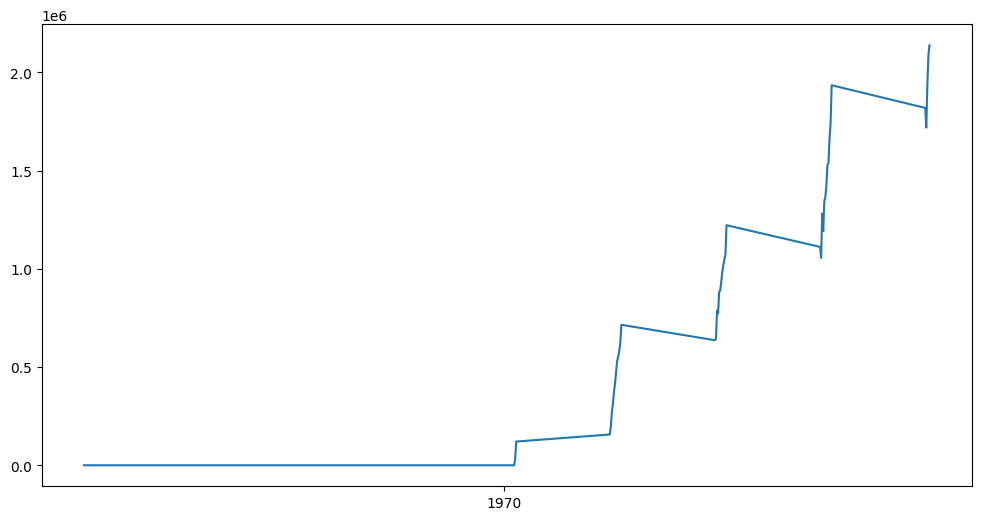

In [170]:
# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(df['O mês de referência no formato AAAAMM'], df['Valor total das transações PIX'])

Text(0, 0.5, 'Valor Total das Transações PIX')

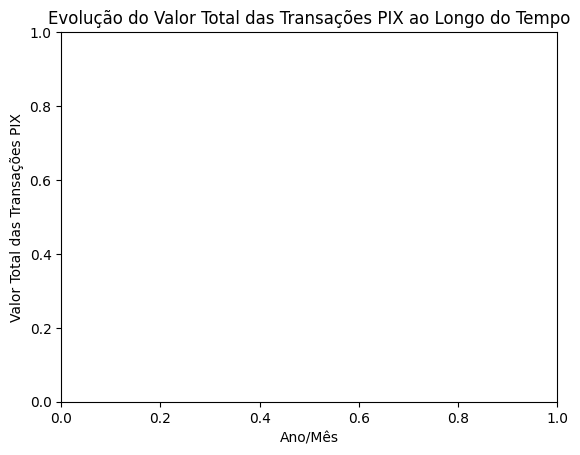

In [153]:
# Adiciona título e rótulos aos eixos
plt.title('Evolução do Valor Total das Transações PIX ao Longo do Tempo')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor Total das Transações PIX')

In [154]:
# Formata o eixo x para exibir os anos e meses de forma legível
plt.gcf().autofmt_xdate()

<Figure size 640x480 with 0 Axes>

In [155]:
# Salva o gráfico como uma imagem (opcional)
plt.savefig('evolucao_pix.png')
# Exibe o gráfico
plt.show()

<Figure size 640x480 with 0 Axes>

**12 - Substituição de Valores:**

Substituindo todos os valores 0.0 na coluna quantityDOC por NaN (valores nulos).


In [156]:
df['Número de transações DOC'] = df['Número de transações DOC'].replace(0.0, np.nan)

Exibinso as primeiras linhas do DataFrame para verificar a substituição

In [157]:
print(df.head())

  O mês de referência no formato AAAAMM  Número de transações PIX  \
0         1970-01-01 00:00:00.000202405                5228826.97   
1         1970-01-01 00:00:00.000202404                4924681.00   
2         1970-01-01 00:00:00.000202403                4903392.34   
3         1970-01-01 00:00:00.000202402                4367133.78   
4         1970-01-01 00:00:00.000202401                4371541.99   

   Valor total das transações PIX  Número de transações TED  \
0                      2137205.79                  69023.11   
1                      2083746.68                  70647.15   
2                      1936188.21                  67565.05   
3                      1718217.65                  65805.87   
4                      1818473.97                  70343.25   

   Valor total das transações TED  Número de transações TEC  \
0                      3482036.97                      0.00   
1                      3652606.48                      0.00   
2                

**13 - Correlação entre Métodos de Pagamento:**

Calcule a correlação entre o valor total das transações PIX (valuePix) e o valor total das transações TED (valueTED). O que você pode inferir sobre a relação entre esses dois métodos de pagamento?


In [158]:
correlacao = df['Valor total das transações PIX'].corr(df['Valor total das transações TED'])

In [159]:
# Exibe o resultado
print(f"A correlação entre o valor total das transações PIX e TED é: {correlacao}")

A correlação entre o valor total das transações PIX e TED é: 0.8132581546380627


Interpretação da correlação

In [160]:
if correlacao > 0:
    print("Há uma correlação positiva entre os valores de PIX e TED, ou seja, quando um aumenta, o outro tende a aumentar também.")
elif correlacao < 0:
    print("Há uma correlação negativa entre os valores de PIX e TED, ou seja, quando um aumenta, o outro tende a diminuir.")
else:
    print("Não há correlação linear entre os valores de PIX e TED.")


Há uma correlação positiva entre os valores de PIX e TED, ou seja, quando um aumenta, o outro tende a aumentar também.


14 - Comparação de Crescimento entre PIX e TED:

Compare o crescimento percentual do valor total das transações PIX (valuePix) e TED (valueTED) ao longo do tempo.


Calculando o crescimento percentual do valor total das transações PIX

In [161]:
df['CrescimentoPix'] = df['Valor total das transações PIX'].pct_change() * 100

Calculando o crescimento percentual do valor total das transações TED

In [162]:
df['CrescimentoTED'] = df['Valor total das transações TED'].pct_change() * 100

Exibindo as primeiras linhas do DataFrame com as novas colunas de crescimento

In [163]:
print(df[['O mês de referência no formato AAAAMM', 'CrescimentoPix', 'CrescimentoTED']].head())

  O mês de referência no formato AAAAMM  CrescimentoPix  CrescimentoTED
0         1970-01-01 00:00:00.000202405             NaN             NaN
1         1970-01-01 00:00:00.000202404       -2.501355        4.898555
2         1970-01-01 00:00:00.000202403       -7.081402       -8.748608
3         1970-01-01 00:00:00.000202402      -11.257715      -10.555718
4         1970-01-01 00:00:00.000202401        5.834902       11.945366


**15 - Participação de Cada Método de Pagamento:**

Calcule a participação percentual de cada método de pagamento (PIX, TED, TEC, Boleto, DOC e CHEQUE) no valor total das transações para o último mês disponível no dataset.


Obtendo o último mês disponível no dataset

In [164]:
ultimo_mes = df['O mês de referência no formato AAAAMM'].max()

Filtrando o DataFrame para incluir apenas o último mês

In [165]:
df_ultimo_mes = df[df['O mês de referência no formato AAAAMM'] == ultimo_mes]

Calculando o valor total das transações para cada método de pagamento

In [166]:
valor_pix = df_ultimo_mes['Valor total das transações PIX'].sum()
valor_ted = df_ultimo_mes['Valor total das transações TED'].sum()
valor_tec = df_ultimo_mes['Valor Total das Transações TEC'].sum()
valor_boleto = df_ultimo_mes['Valor total das transações de boleto'].sum()
valor_doc = df_ultimo_mes['Valor total das transações DOC'].sum()
valor_cheque = df_ultimo_mes['Valor total das transações de cheque'].sum()

Calculando o valor total das transações

In [167]:
valor_total = valor_pix + valor_ted + valor_tec + valor_boleto + valor_doc + valor_cheque

Calculando a participação percentual de cada método de pagamento

In [168]:
participacao_pix = (valor_pix / valor_total) * 100
participacao_ted = (valor_ted / valor_total) * 100
participacao_tec = (valor_tec / valor_total) * 100
participacao_boleto = (valor_boleto / valor_total) * 100
participacao_doc = (valor_doc / valor_total) * 100
participacao_cheque = (valor_cheque / valor_total) * 100

Exibindo os resultados

In [169]:
print(f"Participação percentual no último mês ({ultimo_mes}):")
print(f"PIX: {participacao_pix:.2f}%")
print(f"TED: {participacao_ted:.2f}%")
print(f"TEC: {participacao_tec:.2f}%")
print(f"Boleto: {participacao_boleto:.2f}%")
print(f"DOC: {participacao_doc:.2f}%")
print(f"Cheque: {participacao_cheque:.2f}%")

Participação percentual no último mês (1970-01-01 00:00:00.000202405):
PIX: 34.66%
TED: 56.47%
TEC: 0.00%
Boleto: 8.21%
DOC: 0.00%
Cheque: 0.65%


# Nova seção